In [1]:
#importing modules

import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib as plt

In [2]:
import os
import json
import pandas as pd

def load_json_files(folder_path):
    """
    Loads all JSON files from a given folder into a single pandas DataFrame.

    Parameters:
        folder_path (str): The path to the folder containing JSON files.

    Returns:
        pd.DataFrame: DataFrame containing the combined data from all JSON files.
    """
    all_data = []

    # Iterate through all files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.json'):
            file_path = os.path.join(folder_path, filename)
            try:
                with open(file_path, 'r', encoding='utf-8') as file:
                    data = json.load(file)

                    # Ensure the data is a list of records or a single record
                    if isinstance(data, dict):
                        all_data.append(data)
                    elif isinstance(data, list):
                        all_data.extend(data)
                    else:
                        print(f"Skipping {filename}: Unsupported JSON format")
            except Exception as e:
                print(f"Error reading {filename}: {e}")

    # Convert list of dicts to DataFrame
    return pd.DataFrame(all_data)


In [3]:
nasdaq_df = load_json_files('/home/tarun/Desktop/StockPricePred/data/NASDAQ_100')
fmp_df = load_json_files('/home/tarun/Desktop/StockPricePred/data/FMP')

In [4]:
#glimpse of the datasets
nasdaq_df.tail()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
613432,2025-01-27T00:00:00.000Z,4881.28,4883.84,4807.68,4830.08,2679352,75.413799,75.453350,74.276709,74.622780,2679352,0.00,1.0
613433,2025-01-28T00:00:00.000Z,4786.56,4869.12,4784.64,4865.92,2579061,73.950413,75.225932,73.920750,75.176493,2579061,0.00,1.0
613434,2025-01-29T00:00:00.000Z,4741.12,4807.04,4732.16,4784.64,1750844,73.248384,74.266821,73.109955,73.920750,1750844,0.00,1.0
613435,2025-01-30T00:00:00.000Z,4798.72,4810.88,4756.48,4797.44,2942748,74.138280,74.326147,73.485689,74.118505,2942748,0.00,1.0
613436,2025-01-31T00:00:00.000Z,4687.36,4757.12,4673.28,4750.72,5233177,72.842986,73.927078,72.624179,73.827620,5233177,0.43,1.0


In [5]:
fmp_df.tail()

,symbol,date,calendarYear,period,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,...,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue
10888,CDW,1994-03-31,1994,Q1,1.789954,0.908676,0.041096,18.904110,22.795276,41.699385,...,14.679224,153.083333,-279.543478,-459.250000,-459.250000,-9.185000,14.679224,0.0,339.026316,53.356846
10889,CDW,1993-12-31,1993,Q4,2.312000,1.576000,0.464000,15.581395,12.358209,27.939604,...,15.822567,127.569445,330.990993,322.280703,322.280703,6.378472,15.822567,0.0,284.294575,55.920853
10890,CDW,1993-09-30,1993,Q3,2.037594,1.300752,0.187970,18.300836,14.225806,32.526642,...,17.056639,153.083334,583.174606,583.174606,583.174606,-2.678958,17.056639,0.0,321.885967,63.454232
10891,CDW,1993-06-30,1993,Q2,1.976378,1.259843,0.236220,17.766990,15.082873,32.849863,...,24.204577,65.607143,0.000000,0.000000,0.000000,0.492054,24.204577,NaN,597.417140,86.967608
10892,CDW,1993-03-31,1993,Q1,0.000000,0.000000,0.000000,NaN,0.000000,NaN,...,16.356149,153.083332,0.000000,0.000000,0.000000,0.000000,16.356149,NaN,NaN,0.000000


In [6]:
#basic info on PE ratios
print(f'Basic Info : {fmp_df.info()}')
print('\n\n')
print(f'Shape : {fmp_df.shape}')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10893 entries, 0 to 10892
Data columns (total 58 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   symbol                              10893 non-null  object 
 1   date                                10893 non-null  object 
 2   calendarYear                        10893 non-null  object 
 3   period                              10893 non-null  object 
 4   currentRatio                        10893 non-null  float64
 5   quickRatio                          10893 non-null  float64
 6   cashRatio                           10893 non-null  float64
 7   daysOfSalesOutstanding              10278 non-null  float64
 8   daysOfInventoryOutstanding          10815 non-null  float64
 9   operatingCycle                      10278 non-null  float64
 10  daysOfPayablesOutstanding           10815 non-null  float64
 11  cashConversionCycle                 10278

In [7]:
#basic info on Prices ratios
print(f'Basic Info : {nasdaq_df.info()}')
print('\n\n')
print(f'Shape : {nasdaq_df.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613437 entries, 0 to 613436
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date         613437 non-null  object 
 1   close        613437 non-null  float64
 2   high         613437 non-null  float64
 3   low          613437 non-null  float64
 4   open         613437 non-null  float64
 5   volume       613437 non-null  int64  
 6   adjClose     613437 non-null  float64
 7   adjHigh      613437 non-null  float64
 8   adjLow       613437 non-null  float64
 9   adjOpen      613437 non-null  float64
 10  adjVolume    613437 non-null  int64  
 11  divCash      613437 non-null  float64
 12  splitFactor  613437 non-null  float64
dtypes: float64(10), int64(2), object(1)
memory usage: 60.8+ MB
Basic Info : None



Shape : (613437, 13)


In [8]:
#basic statistical analysis
print(f'Statistics of ratios: \n\n {fmp_df.describe()}')

Statistics of ratios: 

        currentRatio    quickRatio     cashRatio  daysOfSalesOutstanding  \
count  10893.000000  10893.000000  10893.000000            10278.000000   
mean       2.533359      2.215011      0.810981               62.015929   
std        3.870984      3.750251      2.248099              586.343776   
min        0.000000      0.000000     -0.056006             -896.803991   
25%        1.115276      0.867109      0.164114               32.101141   
50%        1.851609      1.566191      0.443906               47.297041   
75%        3.104196      2.688517      0.925389               62.871080   
max      221.398793    211.642193    148.849007            44016.197953   

       daysOfInventoryOutstanding  operatingCycle  daysOfPayablesOutstanding  \
count                10815.000000    10278.000000               10815.000000   
mean                    49.626509      114.235300                 105.784802   
std                    996.036828     1178.474034          

In [9]:
#basic statistical analysis
print(f'Statistics of prices: \n\n {nasdaq_df.describe()}')

Statistics of prices: 

                close           high            low           open  \
count  613437.000000  613437.000000  613437.000000  613437.000000   
mean     1350.928252    1366.971984    1334.052841    1350.801673   
std      5347.011428    5402.132968    5287.437571    5346.574885   
min         0.620000       0.620000       0.593800       0.620000   
25%        51.380000      52.250000      50.500000      51.375000   
50%       161.440000     164.000000     158.999921     161.480000   
75%       739.170000     749.000000     729.000000     739.060000   
max    134657.280000  134884.800000  133764.480000  134496.000000   

             volume       adjClose        adjHigh         adjLow  \
count  6.134370e+05  613437.000000  613437.000000  613437.000000   
mean   5.297938e+06      68.141743      69.027742      67.221941   
std    2.076100e+07     187.949652     190.152543     185.678783   
min    0.000000e+00       0.006458       0.006458       0.006185   
25%    4.7874

In [10]:
#counting the missing values in the data
print(f'Ratios : \n\n {fmp_df.isnull().sum()}')
print('\n\n')
print(f'Percentage of null values (ratios) : \n\n {fmp_df.isna().mean() * 100}')

print(f'NASDAQ : \n\n {nasdaq_df.isnull().sum()}')
print('\n\n')
print(f'Percentage of null values (prices) : \n\n {nasdaq_df.isna().mean() * 100}')


Ratios : 

 symbol                                  0
date                                    0
calendarYear                            0
period                                  0
currentRatio                            0
quickRatio                              0
cashRatio                               0
daysOfSalesOutstanding                615
daysOfInventoryOutstanding             78
operatingCycle                        615
daysOfPayablesOutstanding              78
cashConversionCycle                   615
grossProfitMargin                       0
operatingProfitMargin                   0
pretaxProfitMargin                      0
netProfitMargin                         0
effectiveTaxRate                        0
returnOnAssets                          1
returnOnEquity                          1
returnOnCapitalEmployed                 1
netIncomePerEBT                         0
ebtPerEbit                              0
ebitPerRevenue                          0
debtRatio             

In [11]:
import pandas as pd
import numpy as np

def fill_missing_with_prev_or_next(df):
    # Ensure 'date' is datetime and data is sorted
    df['date'] = pd.to_datetime(df['date'])
    df = df.sort_values(by=['symbol', 'date']).reset_index(drop=True)

    numeric_cols = df.select_dtypes(include='number').columns
    df_filled = df.copy()

    for symbol in df['symbol'].unique():
        symbol_mask = df['symbol'] == symbol
        symbol_df = df[symbol_mask].sort_values(by='date').reset_index()

        for col in numeric_cols:
            for i in range(len(symbol_df)):
                val = symbol_df.loc[i, col]
                if pd.isna(val):
                    original_idx = symbol_df.loc[i, 'index']
                    prev_val = np.nan
                    next_val = np.nan

                    # Look for previous non-null value
                    for j in range(i - 1, -1, -1):
                        prev_val = symbol_df.loc[j, col]
                        if not pd.isna(prev_val):
                            df_filled.at[original_idx, col] = prev_val
                            break
                    else:
                        # If no previous, try next
                        for k in range(i + 1, len(symbol_df)):
                            next_val = symbol_df.loc[k, col]
                            if not pd.isna(next_val):
                                df_filled.at[original_idx, col] = next_val
                                break

    return df_filled



In [12]:
# Assuming 'ratios_df' contains the JSON data loaded into a DataFrame
ratios_df_v2 = fill_missing_with_prev_or_next(fmp_df)

In [13]:
ratios_df_v2.isnull().sum()

symbol                                0
date                                  0
calendarYear                          0
period                                0
currentRatio                          0
quickRatio                            0
cashRatio                             0
daysOfSalesOutstanding                0
daysOfInventoryOutstanding            0
operatingCycle                        0
daysOfPayablesOutstanding             0
cashConversionCycle                   0
grossProfitMargin                     0
operatingProfitMargin                 0
pretaxProfitMargin                    0
netProfitMargin                       0
effectiveTaxRate                      0
returnOnAssets                        0
returnOnEquity                        0
returnOnCapitalEmployed               0
netIncomePerEBT                       0
ebtPerEbit                            0
ebitPerRevenue                        0
debtRatio                             0
debtEquityRatio                       0


In [14]:
def compare_filled_values(original_df, filled_df):
    # Ensure dataframes are aligned
    assert original_df.shape == filled_df.shape
    numeric_cols = original_df.select_dtypes(include='number').columns
    comparisons = {}

    for col in numeric_cols:
        # Find rows where original was NaN and now has a filled value
        mask = original_df[col].isna() & filled_df[col].notna()

        if mask.sum() > 0:
            changed_rows = filled_df[mask][['symbol', 'date', col]].copy()
            changed_rows['filled_value'] = filled_df.loc[mask, col]
            changed_rows['original_value'] = original_df.loc[mask, col]
            comparisons[col] = changed_rows.head(5)

    return comparisons


In [15]:
original_df = fmp_df.copy()
#Fill nulls
filled_df = fill_missing_with_prev_or_next(fmp_df)
#Compare changes
changes = compare_filled_values(original_df, filled_df)
#print changes
for col, examples in changes.items():
    print(f"\nField: {col}")
    print(examples[['symbol', 'date', 'original_value', 'filled_value']])



Field: daysOfSalesOutstanding
    symbol       date  original_value  filled_value
26    AAPL 1992-03-31             NaN     45.802448
27    AAPL 1992-06-30             NaN     49.473624
173   ABNB 2023-03-31             NaN    384.158416
175   ABNB 2023-09-30             NaN      5.457757
176   ABNB 2023-12-31             NaN      8.318305

Field: daysOfInventoryOutstanding
    symbol       date  original_value  filled_value
26    AAPL 1992-03-31             NaN     53.642057
27    AAPL 1992-06-30             NaN     52.892399
366    ADI 1992-07-31             NaN    189.058442
367    ADI 1992-10-31             NaN    202.606635
618    ADP 2015-12-31             NaN      0.000000

Field: operatingCycle
    symbol       date  original_value  filled_value
26    AAPL 1992-03-31             NaN     99.444504
27    AAPL 1992-06-30             NaN    102.366023
173   ABNB 2023-03-31             NaN    384.158416
175   ABNB 2023-09-30             NaN      5.457757
176   ABNB 2023-12-31      

In [16]:
import pandas as pd

# Ensure date is in datetime format and sorted
fmp_df['date'] = pd.to_datetime(fmp_df['date'])
fmp_df = fmp_df.sort_values(by=['symbol', 'date'])

# Forward fill missing values within each symbol group
fmp_df_filled = fmp_df.groupby('symbol').ffill()

# Optional: if you want to keep non-numeric columns like 'symbol', merge them back
fmp_df_filled[['symbol']] = fmp_df[['symbol']]

# Done!


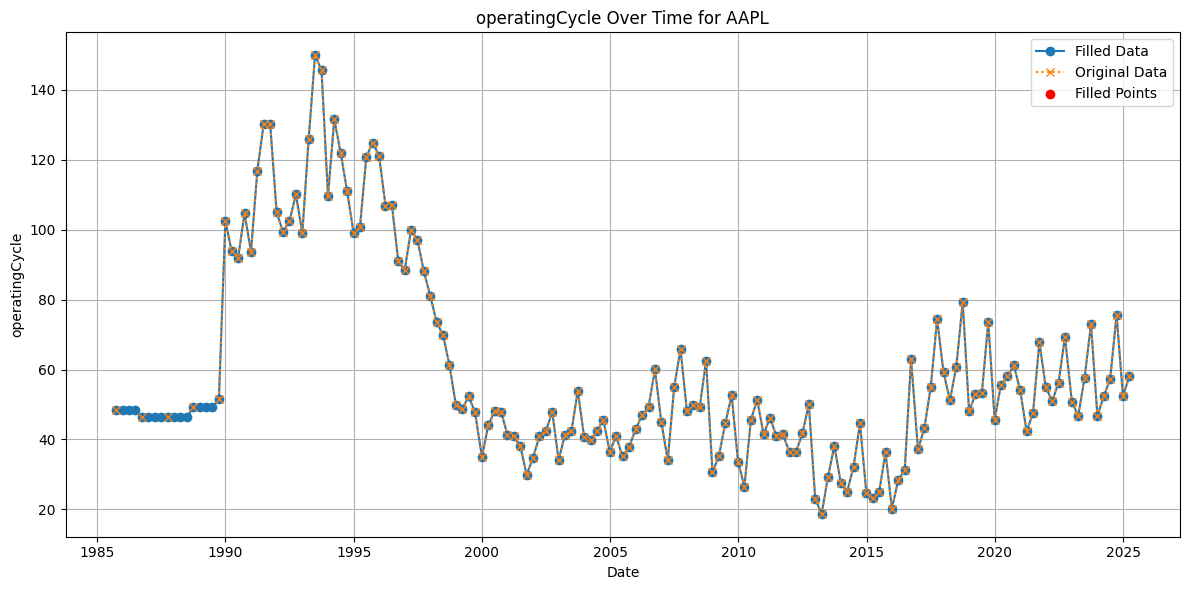

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assume fmp_df is already loaded and 'ratios_df' is the filled version
original_df = fmp_df.copy()
filled_df = ratios_df_v2.copy()

# Filter for a specific stock, e.g., ABNB
symbol = "AAPL"
metric = "operatingCycle"

orig_abnb = original_df[original_df['symbol'] == symbol].copy()
filled_abnb = filled_df[filled_df['symbol'] == symbol].copy()

# Convert date if not already
orig_abnb['date'] = pd.to_datetime(orig_abnb['date'])
filled_abnb['date'] = pd.to_datetime(filled_abnb['date'])

# Ensure sorted
orig_abnb.sort_values(by='date', inplace=True)
filled_abnb.sort_values(by='date', inplace=True)

# Identify filled points
replaced_mask = orig_abnb[metric].isna() & filled_abnb[metric].notna()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(orig_abnb['date'], filled_abnb[metric], label='Filled Data', marker='o')
plt.plot(orig_abnb['date'], orig_abnb[metric], label='Original Data', linestyle='dotted', marker='x')
plt.scatter(orig_abnb.loc[replaced_mask, 'date'],
            filled_abnb.loc[replaced_mask, metric],
            color='red', label='Filled Points', zorder=5)

plt.title(f"{metric} Over Time for {symbol}")
plt.xlabel("Date")
plt.ylabel(metric)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
def extract_ratio_sequence(df, symbol, start, end):
    """
    Extracts ratio values between start and end quarter indices for a given stock symbol.

    Args:
        df (pd.DataFrame): The ratios dataframe. Must contain 'symbol', 'date' and numeric ratio columns.
        symbol (str): The stock symbol to extract for.
        start (int): The starting index (0-based, most recent quarter = -1).
        end (int): The ending index (inclusive, must be >= start).

    Returns:
        dict: {
            t_start: [r1, r2, ...],
            t_start+1: [...],
            ...
            t_end: [...]
        }
    """
    import pandas as pd

    # Input validation
    if start > end:
        raise ValueError("Start index must be <= end index")
    
    if symbol not in df['symbol'].unique():
        raise ValueError(f"Symbol '{symbol}' not found in dataframe.")

    # Filter and sort
    symbol_df = df[df['symbol'] == symbol].sort_values(by='date').reset_index(drop=True)

    # Get numeric ratio columns
    ratio_cols = df.select_dtypes(include='number').columns.tolist()
    ratio_cols = [col for col in ratio_cols if col not in ['index']]  # exclude index if present

    output = {}

    for t in range(start, end + 1):
        try:
            row = symbol_df.iloc[t]
            ratios = [row[col] for col in ratio_cols]
            output[t] = ratios
        except IndexError:
            output[t] = f"Index {t} out of range"

    return output

In [19]:
# Example: Extract quarters 0 to 4 for AAPL
result = extract_ratio_sequence(ratios_df_v2, 'AAPL', 0, 4)
print(result)

{0: [2.7830060934326335, 2.217670954637779, 1.140825998645904, 48.37197949719307, 0.0, 48.37197949719307, 0.0, 48.37197949719307, 1.0, -3.3226751281425435, -6.645350256285087, 0.0, 1.0, 0.0, 0.0, -2.1243757802746566, 0.0, 2.0, -3.3226751281425435, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.7006357856494096, 1.8605812897366032, 0.0, 0.0, 4.532079646017699, 0.43762016663106174, 0.01793269230769231, 0.013612637362637363, 0.024324402355930246, 0.0, 0.17483594482389178, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.7695378252497729, 1.7695378252497729, 2.3776679834024894, 0.0, 0.0, 0.0, 0.0, 0.0, 2.3776679834024894, 0.0014814682945714997, -0.46803097979872177, 1.7695378252497729], 1: [0.0, 0.0, 0.0, 48.37197949719307, 0.0, 48.37197949719307, 0.0, 48.37197949719307, 1.0, 1.0, 2.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01793269230769231, 0.013612637362637363, 0.024324402355930246, 0.0, 0.17483594482389178, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.545547

In [20]:
def build_symbol_ratio_dataframe(df, start, end):
    """
    Builds a multi-symbol DataFrame where each row corresponds to a quarter's ratios
    for a given symbol between 'start' and 'end' index.

    Args:
        df (pd.DataFrame): Original ratios dataframe with multiple symbols and dates.
        start (int): Start quarter index.
        end (int): End quarter index.

    Returns:
        pd.DataFrame: DataFrame with columns ['symbol', 't_index', <ratios...>]
    """
    import pandas as pd

    ratio_cols = df.select_dtypes(include='number').columns.tolist()
    ratio_cols = [col for col in ratio_cols if col not in ['index']]

    all_rows = []

    for symbol in df['symbol'].unique():
        symbol_df = df[df['symbol'] == symbol].sort_values(by='date').reset_index(drop=True)

        for t in range(start, end + 1):
            try:
                row = symbol_df.iloc[t]
                row_data = {
                    'symbol': symbol,
                    't_index': t,
                }
                row_data.update({col: row[col] for col in ratio_cols})
                all_rows.append(row_data)
            except IndexError:
                # Skip or fill with NaNs if you prefer
                continue

    result_df = pd.DataFrame(all_rows)
    return result_df


In [21]:
# Assuming your cleaned dataframe is called ratios_df_v2
output_df = build_symbol_ratio_dataframe(ratios_df_v2, start=0, end=4)
output_df.tail()


,symbol,t_index,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,cashConversionCycle,...,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue
500,ZS,0,0.000000,0.000000,0.000000,93.513089,0.0,93.513089,22.865920,70.647169,...,41.526252,-25.836232,0.000000,0.000000,0.000000,0.000000,41.526252,0.0,-215.949808,0.000000
501,ZS,1,1.631051,1.631051,1.191856,93.513089,0.0,93.513089,22.865920,70.647169,...,38.829771,-27.050688,-147.158525,-170.392640,-170.392640,4.328110,38.829771,0.0,-215.949808,13.727614
502,ZS,2,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,35.157949,-23.601368,-192.713915,-482.377145,-482.377145,-1.416082,35.157949,0.0,-301.498743,14.123932
503,ZS,3,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,31.997892,-25.074616,-452.475718,-1564.122872,-1564.122872,4.388058,31.997892,0.0,-301.498743,0.000000
504,ZS,4,1.402389,1.402389,0.985638,66.164907,0.0,66.164907,23.538659,42.626248,...,103.739170,-113.054020,-1920.077485,14072.666667,14072.666667,1.451666,103.739170,0.0,-572.067468,57.539003


In [26]:
def label_ratios_with_price_change_single_symbol(ratios_df, nasdaq_df, start, end):
    import numpy as np
    import pandas as pd
    
    # Convert 'date' columns to datetime and remove timezone info to avoid comparison errors
    ratios_df['date'] = pd.to_datetime(ratios_df['date']).dt.tz_localize(None)
    nasdaq_df['date'] = pd.to_datetime(nasdaq_df['date']).dt.tz_localize(None)
    
    output = {}
    
    # Assuming ratios_df has only one symbol now (or you want to handle single symbol)
    # Sort dataframes by date ascending
    ratios_df = ratios_df.sort_values(by='date').reset_index(drop=True)
    nasdaq_df = nasdaq_df.sort_values(by='date').reset_index(drop=True)

    total_periods = len(ratios_df)
    if start < 0 or end >= total_periods or start > end:
        raise ValueError(f"start ({start}) and end ({end}) are out of range for data length {total_periods}")

    for i in range(start, end + 1):
        row = ratios_df.iloc[i]
        date = row['date']

        # Get the price at or just after this date in nasdaq_df
        current_price_row = nasdaq_df[nasdaq_df['date'] >= date].head(1)
        if current_price_row.empty:
            continue  # no price data for this quarter date

        current_price = current_price_row['adjClose'].values[0]

        # Get the price one month after the quarter date (approx 30 days)
        future_date = date + pd.Timedelta(days=30)
        future_price_row = nasdaq_df[nasdaq_df['date'] >= future_date].head(1)
        if future_price_row.empty:
            continue  # no future price data available

        future_price = future_price_row['adjClose'].values[0]

        # Calculate price change percentage
        price_change = (future_price - current_price) / current_price * 100

        label = 'BUY' if price_change > 5 else 'SELL'

        # Collect the ratios as list, exclude non-numeric and date columns
        ratio_values = row.drop(labels=['symbol', 'date'], errors='ignore').to_list()

        output[i] = [ratio_values, label]

    return output


In [29]:
labeled_data = label_ratios_with_price_change_single_symbol(ratios_df_v2, nasdaq_df, start=0, end=4)
print(labeled_data)

{0: [['1986', 'Q1', 0.0, 0.0, 0.0, 35.88785046728972, 0.0, 35.88785046728972, 0.0, 35.88785046728972, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03508064516129032, 0.009274193548387096, 0.07184949556110831, 0.0, 0.22279129321382843, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.072844120415226, 0.0, 0.0, 0.0, 0.0, 0.0, 9.072844120415226, 0.20092694296353847, -5.11816316039604, 0.0], 'BUY'], 1: [['1986', 'Q1', 0.0, 0.0, 0.0, 37.17391304347826, 0.0, 37.17391304347826, 0.0, 37.17391304347826, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009319001266521413, 0.0012024517763253436, 0.000613683204192448, 0.0, 0.10877192982456141, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.968521599311966, 0.0, 0.0, 0.0, 0.0, 0.0, 7.968521599311966, 0.00179095457396839, -5.9925377006184934, 0.0], 'BUY'], 2: [['1985', 'Q4', 1.6856524873828407, 1.0973323720259553, 1.0591204